Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

In [0]:
# Your Work Here
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
chess_tran = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')

In [54]:
# // columns
# url -	Source Data
# ID - 	Player ID
# Federation -	Player's new federation
# Form.Fed -	Player's former federation
# Transfer Date	- Date of transfer
print(chess_tran.shape)
chess_tran.sample(5)


(932, 5)


,url,ID,Federation,Form.Fed,Transfer Date
198,https://ratings.fide.com/fedchange.phtml?year=...,3501841,USA,CUB,3/17/04
748,https://ratings.fide.com/fedchange.phtml?year=...,2001390,CAM,USA,4/17/14
498,https://ratings.fide.com/fedchange.phtml?year=...,2044846,TUR,USA,7/1/10
713,https://ratings.fide.com/fedchange.phtml?year=...,8609608,SIN,CHN,5/15/14
289,https://ratings.fide.com/fedchange.phtml?year=...,3800253,ESP,PER,5/26/06


In [55]:
# cze isnt in example chart.
# 89  counts too the USA
chess_tran['Federation'].value_counts(dropna=False).head(11)

USA    89
GER    55
CAN    44
ESP    41
RUS    36
FRA    34
CRO    32
BIH    32
TUR    31
CZE    29
AUT    29
Name: Federation, dtype: int64

In [56]:
chess_tran.isnull().sum()

url              0
ID               0
Federation       0
Form.Fed         9
Transfer Date    0
dtype: int64

In [57]:
# pulling only contries that transfered to usa
condition = chess_tran['Federation'] == 'USA'
usa_chess = chess_tran[condition]
usa_chess.shape

(89, 5)

In [58]:
# top 10 to transfer to us
usa_chess['Form.Fed'].value_counts().head(12)

IND    11
ARM     8
CUB     7
UKR     7
RUS     7
PHI     6
GEO     4
BLR     3
AZE     3
POL     2
LAT     2
COL     2
Name: Form.Fed, dtype: int64

In [59]:
# list of top 10 countries to transfer to the usa
usa_chess['Form.Fed'].value_counts().head(12).index.tolist()

['IND',
 'ARM',
 'CUB',
 'UKR',
 'RUS',
 'PHI',
 'GEO',
 'BLR',
 'AZE',
 'POL',
 'LAT',
 'COL']

In [60]:
# filter to top 10
mylist2 = ['IND',
 'ARM',
 'CUB',
 'UKR',
 'RUS',
 'PHI',
 'GEO',
 'BLR',
 'AZE',
 'COL']
condition2 = usa_chess['Form.Fed'].isin(mylist2)
chess_final = usa_chess[condition2]
chess_final.shape

(58, 5)

In [61]:
# rename
chess_final['Country'] = chess_final['Form.Fed'].map({'IND':'India',
                                         'ARM':'Armenia',
                                         'CUB':'Cuba',
                                         'UKR':'Ukraine',
                                         'RUS':'Russia',
                                         'PHI':'Philippines',
                                         'GEO':'Georgia',
                                         'BLR':'Belarus',
                                         'AZE':'Azerbaijan',
                                         'COL':'Colombia'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [62]:
# check for new column.
chess_final.head(1)

,url,ID,Federation,Form.Fed,Transfer Date,Country
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00,Philippines


In [118]:
# double check value countes
final = chess_final['Country'].value_counts().reset_index()
print(final)

         index  Country
0        India       11
1      Armenia        8
2      Ukraine        7
3       Russia        7
4         Cuba        7
5  Philippines        6
6      Georgia        4
7   Azerbaijan        3
8      Belarus        3
9     Colombia        2


In [122]:
final.sort_index()

,index,Country
0,India,11
1,Armenia,8
2,Ukraine,7
3,Russia,7
4,Cuba,7
5,Philippines,6
6,Georgia,4
7,Azerbaijan,3
8,Belarus,3
9,Colombia,2


In [0]:
final_index = final['index']
final_val = final['Country']

In [83]:
plot_data = final['Country']
plot_data.index = final_index
plot_data.columns = final_val
plot_data

index
India          11
Armenia         8
Ukraine         7
Russia          7
Cuba            7
Philippines     6
Georgia         4
Azerbaijan      3
Belarus         3
Colombia        2
Name: Country, dtype: int64

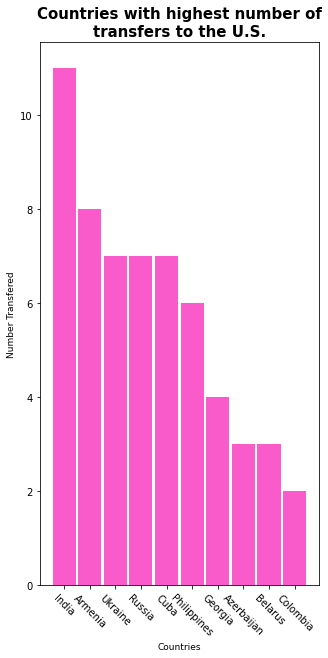

In [114]:
# create plot
fig, ax = plt.subplots(figsize=(5,10))

# Background
fig.patch.set(facecolor='white')

# set bar
ax.bar(x=range(1,11), height=final_val, width=0.9, color='#F95CCA')

# axes background
ax.set(facecolor='white')

#set title and subtitle
ax.set_title("Countries with highest number of\ntransfers to the U.S.",
             fontsize=15,
             fontweight='bold',
             x=.5,
             y=1)


# x, y lables
ax.set_xlabel('Countries', fontsize=9)
ax.set_ylabel('Number Transfered', fontsize=9)
ax.set_xticklabels(final_index, rotation=-45);
ax.set_xticks(range(1,11));


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here